## Read load forecast for any date

In [1]:
# your access configuration:
config_file = 'access_config.json'

# forecast date:
import datetime
date = datetime.datetime(2018, 10, 16)

In [2]:
import pytz
import requests
import pandas as pd
import json
import io

with open(config_file, 'r') as f: config = json.load(f)
addr = config['address']
folder = config['load_folder']

date_str = date.date().strftime('%Y-%m-%d')
url_crystalball24 = 'http://{0}/{1}/pred_{2}.csv'.format(addr, folder, date_str)
try:
    r = requests.get(url_crystalball24, timeout=5)
    with io.StringIO(r.text) as f:
        lf_data = pd.read_csv(f)
except:
    print('Problem with reading from Crystalball24.com')

### Your predictions:

In [3]:
print(lf_data)

          date  hour    prediction       lf_miso  actual_miso
0   2018-10-16     1  63929.331348  65120.000000     64214.59
1   2018-10-16     2  62412.659180  63720.000000     62885.57
2   2018-10-16     3  61620.577539  63010.000000     62215.39
3   2018-10-16     4  61757.639062  63150.000000     62386.69
4   2018-10-16     5  63391.496045  64999.999512     64328.59
5   2018-10-16     6  67057.200391  68770.000000     68905.54
6   2018-10-16     7  72833.234021  74930.000122     74927.33
7   2018-10-16     8  74735.217505  76570.000000     76691.13
8   2018-10-16     9  75210.087476  76780.000000     76582.17
9   2018-10-16    10  75568.003107  76790.000244     76036.57
10  2018-10-16    11  75636.720559  76740.000244     75646.37
11  2018-10-16    12  75465.238541  76370.000244     75343.40
12  2018-10-16    13  75220.871222  75950.000000     75067.35
13  2018-10-16    14  74961.136108  75580.000000     74805.05
14  2018-10-16    15  74506.694818  74960.000000     74365.56
15  2018

### make a nice step plot:

<IPython.core.display.Javascript object>


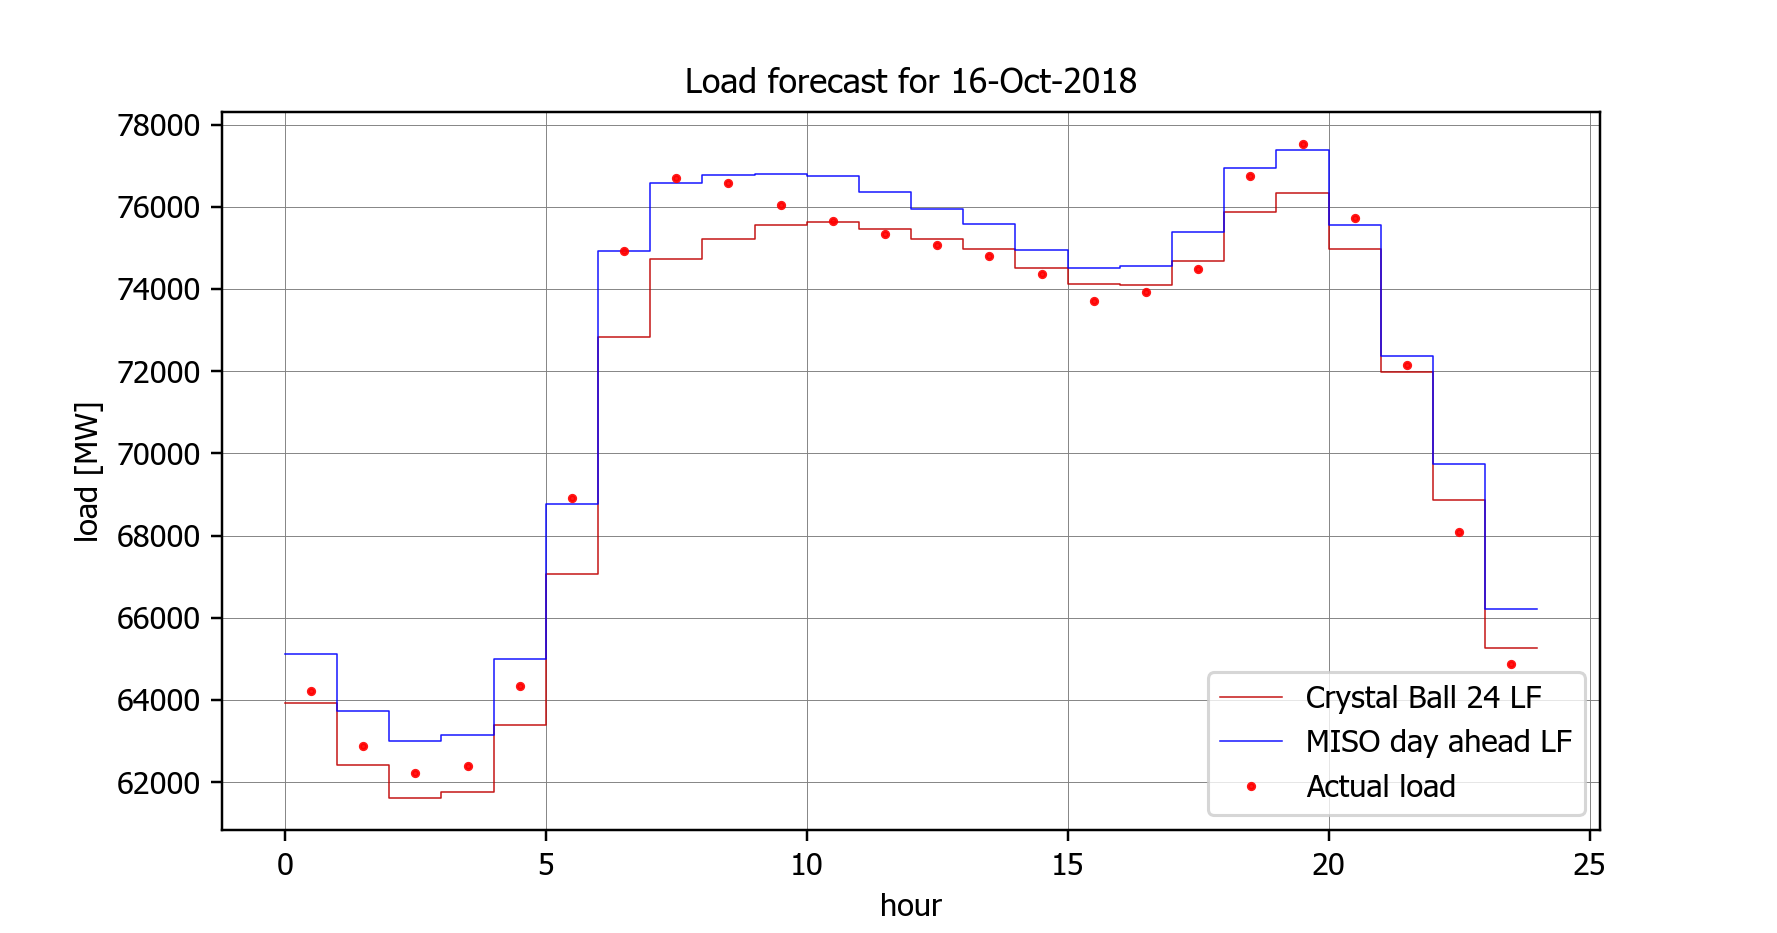

In [4]:
%matplotlib notebook
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
import matplotlib.pyplot as plt

pred = lf_data.prediction.values
miso = lf_data.lf_miso.values

hours = [h for h in range(0, pred.shape[0]+1)]
pred = [pred[0],] + [p for p in pred]
miso = [miso[0],] + [m for m in miso]

if 'actual_miso' in lf_data.columns:
    actual = lf_data.actual_miso.values
    hours_actual = [h+0.5 for h in range(len(actual))]
else:
    actual = None

plt.figure(1, figsize=(8,4.2))
plt.title("Load forecast for " + date.strftime('%d-%b-%Y'), fontsize=11)
plt.step(hours, pred, '-', color=(0.75,0,0), linewidth=0.5, alpha=0.9, label='Crystal Ball 24 LF')
plt.step(hours, miso, '-', color='blue', linewidth=0.5, alpha=0.9, label='MISO day ahead LF')
if actual is not None:
    plt.plot(hours_actual, actual, '.', color='red', markersize=4, alpha=0.9, label='Actual load')
plt.grid(color='grey', linestyle='-', linewidth=0.3)
plt.xlabel('hour')
plt.ylabel('load [MW]')
plt.legend(loc='lower right')
plt.show()